# Diabetes Prediction using Machine Learning

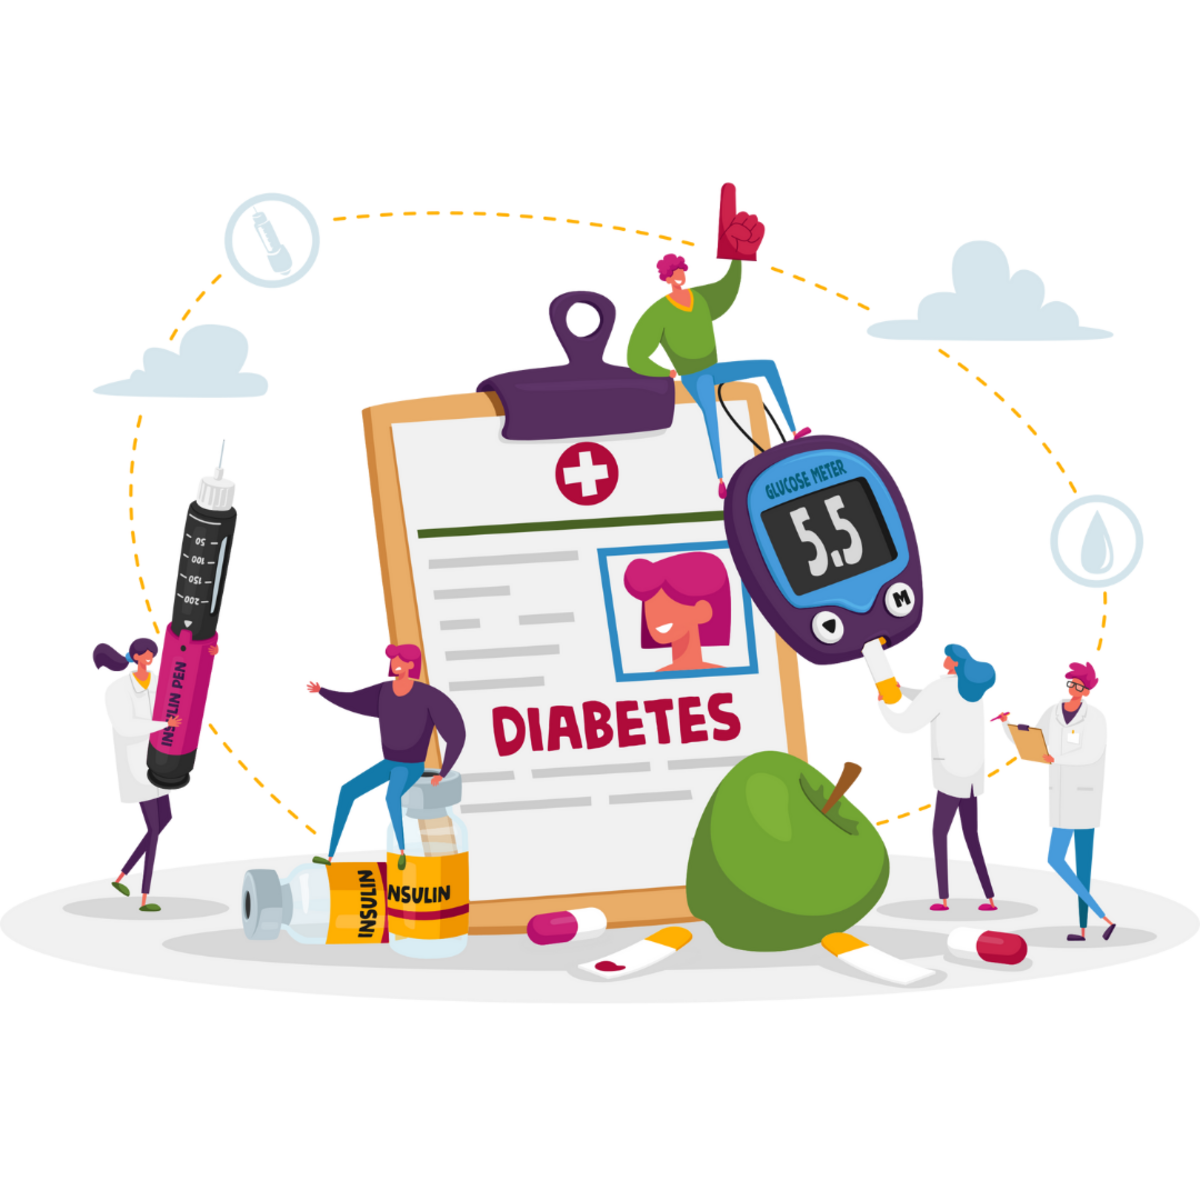

# Importing Necessary Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv('diabetes_data.csv')

# EDA

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.shape

In [ ]:
df.columns

### About the Dataset

#### Context
The dataset originates from the National Institute of Diabetes and Digestive and Kidney Diseases. The primary aim is to predict whether a patient has diabetes based on several diagnostic measurements. This dataset is crucial for developing models that can assist in early diagnosis and intervention for diabetes, potentially improving patient outcomes and reducing healthcare costs.

#### Content
The dataset includes several constraints and specifics regarding the patient selection:

- **Patient Demographics**: 
  - All patients are females.
  - Patients are at least 21 years old.
  - All patients are of Pima Indian heritage.

The dataset comprises the following features:

1. **Pregnancies**:
   - **Description**: Number of times the patient has been pregnant.
   - **Type**: Numeric (Integer)
   - **Relevance**: Previous pregnancies can impact the likelihood of diabetes due to physiological changes during pregnancy.

2. **Glucose**:
   - **Description**: Plasma glucose concentration measured two hours after an oral glucose tolerance test.
   - **Type**: Numeric (Float)
   - **Relevance**: High plasma glucose levels are a key indicator of diabetes.

3. **BloodPressure**:
   - **Description**: Diastolic blood pressure in millimeters of mercury (mm Hg).
   - **Type**: Numeric (Float)
   - **Relevance**: Blood pressure levels can be indicative of overall cardiovascular health, which is often linked to diabetes.

4. **SkinThickness**:
   - **Description**: Triceps skin fold thickness in millimeters.
   - **Type**: Numeric (Float)
   - **Relevance**: This measurement can indicate subcutaneous fat levels, which may be associated with insulin resistance and diabetes.

5. **Insulin**:
   - **Description**: 2-hour serum insulin in micro-units per milliliter (mu U/ml).
   - **Type**: Numeric (Float)
   - **Relevance**: Insulin levels are crucial for understanding insulin resistance, a precursor to diabetes.

6. **BMI (Body Mass Index)**:
   - **Description**: Weight in kilograms divided by the square of height in meters (kg/m²).
   - **Type**: Numeric (Float)
   - **Relevance**: BMI is a significant indicator of obesity, which is a major risk factor for diabetes.

7. **DiabetesPedigreeFunction**:
   - **Description**: A function that scores the likelihood of diabetes based on family history.
   - **Type**: Numeric (Float)
   - **Relevance**: Family history is a strong predictor of diabetes risk.

8. **Age**:
   - **Description**: Age of the patient in years.
   - **Type**: Numeric (Integer)
   - **Relevance**: Age is a risk factor, as the likelihood of developing diabetes increases with age.

9. **Outcome**:
   - **Description**: Class variable indicating the presence of diabetes.
     - 0: Non-diabetic
     - 1: Diabetic
   - **Type**: Categorical (Binary)
   - **Relevance**: This is the target variable that models aim to predict.

#### Data Summary
The dataset is structured to include comprehensive features that can contribute to the predictive modeling of diabetes. By analyzing these features, one can develop various machine learning models to classify patients based on their likelihood of having diabetes. The features represent a mix of personal medical history, physiological measurements, and family history, all of which are critical in understanding and predicting diabetes.

In [ ]:
df.duplicated().sum()

In [ ]:
df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.nunique()

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 20:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

In [ ]:
df['Outcome'].unique()

In [ ]:
df['Outcome'].value_counts()

# Data Visualization

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

In [ ]:
for i in range(len(continuous)):6
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.scatterplot(x=continuous[i], y=continuous[j], data=df, hue = 'Outcome', palette='hls')
        plt.title(f'Scatter plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, palette='hls')
        plt.title(f'Line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

In [ ]:
for i in range(len(continuous)):
    for j in range(i + 1, len(continuous)):
        plt.figure(figsize=(15, 6))
        sns.lineplot(x=continuous[i], y=continuous[j], data=df, hue = 'Outcome', palette='hls')
        plt.title(f'Line plot of {continuous[i]} vs {continuous[j]}')
        plt.show()

In [ ]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxplot(data=df, x=dis, y=cont)
        plt.title(f'{dis} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.boxenplot(data=df, x=dis, y=cont)
        plt.title(f'{dis} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.violinplot(data=df, x=dis, y=cont)
        plt.title(f'{dis} vs {cont}')
        plt.xticks(rotation = 90)
        plt.show()

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
corr_matrix

In [ ]:
threshold = 0.7
features_to_drop = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            if colname not in features_to_drop:
                features_to_drop.append(colname)

In [ ]:
features_to_drop

# Feature Engineering

In [ ]:
def bmi_category(bmi):
    if bmi <= 18.5:
        return 'Underweight'
    elif 18.5 < bmi <= 24.9:
        return 'Healthy'
    elif 25 <= bmi <= 29.9:
        return 'Pre-obese'
    elif 30 <= bmi <= 34.9:
        return 'Obesity class 1'
    elif 35 <= bmi <= 39.9:
        return 'Obesity class 2'
    else:
        return 'Obesity class 3'

In [ ]:
df['BMI_Category'] = df['BMI'].apply(bmi_category)

In [ ]:
def insulin_category(insulin):
    if insulin < 25:
        return 'Fasting or 3+ hours after glucose ingestion'
    elif 30 <= insulin <= 230:
        return '30 minutes after glucose administration'
    elif 18 <= insulin <= 276:
        return '1 hour after glucose ingestion'
    elif 16 <= insulin <= 166:
        return '2 hours after glucose ingestion'
    else:
        return 'Other'

In [ ]:
df['Insulin_Category'] = df['Insulin'].apply(insulin_category)

In [ ]:
df

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

In [ ]:
df_new = pd.get_dummies(df, columns=['BMI_Category', 'Insulin_Category'])

In [ ]:
numerical_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df_new[numerical_columns] = scaler.fit_transform(df_new[numerical_columns])

In [ ]:
X = df_new.drop(['Outcome'], axis = 1)
y = df_new['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

In [ ]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(kernel='linear')
sv.fit(X_train, y_train)

In [ ]:
y_pred = sv.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1-score: {:.2f}".format(f1))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)

In [ ]:
sns.heatmap(cm, annot=True, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
report = classification_report(y_test, y_pred)
print("Classification report:")
print(report)

In [ ]:
import pickle

In [ ]:
model_filename = 'logistic_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")